In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("House_Rent_Dhaka.csv")
df.head()


,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  28800 non-null  int64 
 1   Location    28800 non-null  object
 2   Area        28800 non-null  object
 3   Bed         28800 non-null  int64 
 4   Bath        28800 non-null  int64 
 5   Price       28800 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [3]:
# Convert 'Area' from strings like '1,000 sqft' → 1000

df['Area'] = df['Area'].astype(str)
df['Price'] = df['Price'].astype(str)
df['Area'] = df['Area'].str.replace(',', '', regex=True)
df['Area'] = df['Area'].str.replace(' sqft', '', regex=True)
df['Area'] = df['Area'].astype(int)

In [4]:
# Convert 'Price' from strings like '75 Thousand' → 75000

def convert_price(price_str):
    if 'Thousand' in price_str:
        return int(float(price_str.replace(' Thousand', '')) * 1000)
    elif 'Lakh' in price_str:
        return int(float(price_str.replace(' Lakh', '')) * 100000)
    else:
        return None  # unexpected format

df['Price'] = df['Price'].apply(convert_price)

In [5]:
df.head()

,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka",1600,3,3,20000
1,1,"Farmgate, Tejgaon, Dhaka",900,2,2,20000
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...",1250,3,3,18000
3,3,"Gulshan 1, Gulshan, Dhaka",2200,3,4,75000
4,4,"Baridhara, Dhaka",2200,3,3,75000


In [6]:
df['Location'].value_counts()


Location
Mohammadpur, Dhaka                     757
Mirpur, Dhaka                          556
Block D, Section 12, Mirpur, Dhaka     417
Dhanmondi, Dhaka                       414
Block E, Section 12, Mirpur, Dhaka     411
                                      ... 
2nd Lane, Gopibag, Motijheel, Dhaka      1
Block D2, Section 10, Mirpur, Dhaka      1
Block D, Aftab Nagar, Dhaka              1
Panthapath, Kathalbagan, Dhaka           1
Chowdhury Bazar, Lalbagh, Dhaka          1
Name: count, Length: 730, dtype: int64

In [7]:
df['Location'] = df['Location'].astype(str)  # just in case
df['Location'] = df['Location'].astype('category').cat.codes

In [8]:
df['Location'].value_counts()

Location
462    757
452    556
194    417
297    414
212    411
      ... 
3        1
199      1
169      1
526      1
288      1
Name: count, Length: 730, dtype: int64

In [9]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [10]:
# Target (what we want to predict)
y = df['Price']

# Features (everything else except 'Price')
X = df.drop(columns=['Price'])
print("X shape:", X.shape)
print("y shape:", y.shape)
print(X.head())


X shape: (28800, 4)
y shape: (28800,)
   Location  Area  Bed  Bath
0       238  1600    3     3
1       329   900    2     2
2       125  1250    3     3
3       346  2200    3     4
4        59  2200    3     3


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


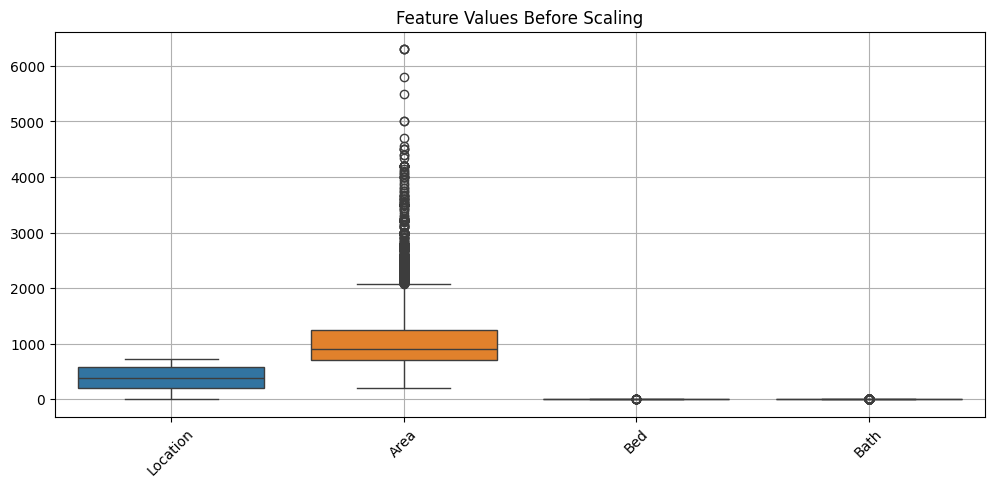

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame copy of unscaled X_train
X_train_df = pd.DataFrame(X_train, columns=X.columns)

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_train_df)
plt.title("Feature Values Before Scaling")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


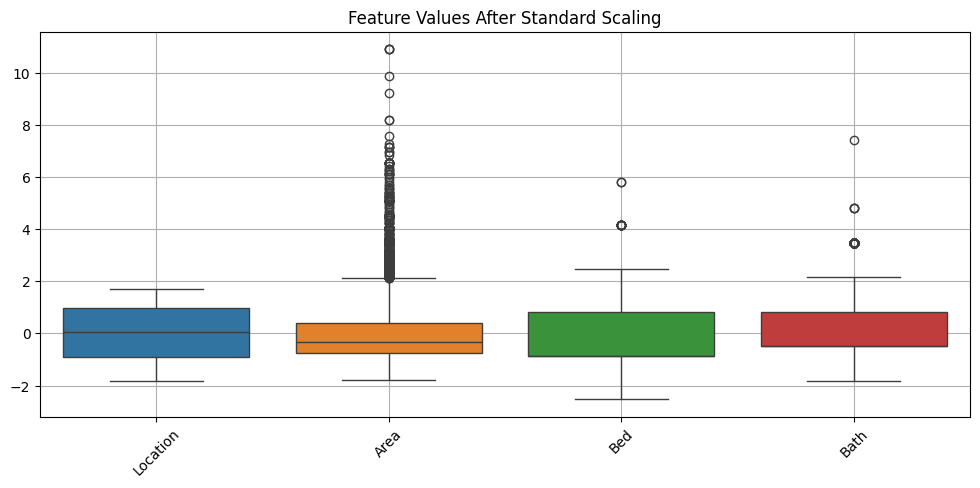

In [14]:
# Convert the scaled NumPy array back to DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_scaled_df)
plt.title("Feature Values After Standard Scaling")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [15]:
print(df.columns)

Index(['Location', 'Area', 'Bed', 'Bath', 'Price'], dtype='object')


---
> # Linear Regression
---

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

print("Intercept (beta_0):", lr.intercept_)
print("Coefficients (beta_1...n):", lr.coef_)


Intercept (beta_0): 21085.088758680555
Coefficients (beta_1...n): [-1.37261945e+01  2.53725972e+04 -6.44152015e+03 -5.17619551e+03]


In [17]:
# Evaluate
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("📊 Linear Regression (sklearn) Results:")
print("R² Score:", r2_lr)

📊 Linear Regression (sklearn) Results:
R² Score: 0.6484936665661843


---
> # Batch Gradient Descent
---

In [18]:
class BatchGradientDescent:

    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.coefficients_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0  # beta_0
        self.coefficients_ = np.ones(X_train.shape[1])  # beta_1, beta_2, ...

        for i in range(self.n_epochs):
            y_pred = np.dot(X_train, self.coefficients_) + self.intercept_
            
            # Gradients
            slope_intercept = -2 * np.mean(y_train - y_pred)
            slope_coefficients = -2 * np.dot((y_train - y_pred), X_train) / X_train.shape[0]

            # Updates
            self.intercept_ -= self.lr * slope_intercept
            self.coefficients_ -= self.lr * slope_coefficients

        print("Intercept (beta_0):", self.intercept_)
        print("Coefficients (beta_1...n):", self.coefficients_)

    def predict(self, X_test):
        return np.dot(X_test, self.coefficients_) + self.intercept_


In [19]:
bgd = BatchGradientDescent(learning_rate=0.01, n_epochs=1000)
bgd.fit(X_train_scaled, y_train)
y_pred_bgd = bgd.predict(X_test_scaled)


Intercept (beta_0): 21085.088723195036
Coefficients (beta_1...n): [-1.77348654e+01  2.49721578e+04 -6.32498978e+03 -4.88865458e+03]


In [20]:
r2_bgd = r2_score(y_test, y_pred_bgd)
mse_bgd = mean_squared_error(y_test, y_pred_bgd)

print("📊 Batch Gradient Descent Results:")
print("R² Score:", r2_bgd)


📊 Batch Gradient Descent Results:
R² Score: 0.6484095201767446


---
> # Stochastic Gradient Descent
---

In [21]:
class StochasticGradientDescent:

    def __init__(self, n_epochs=1000):
        self.coefficients_ = None
        self.intercept_ = None
        self.n_epochs = n_epochs
        self.t0 = 5
        self.t1 = 50

    def learning_rate(self, t):
        return self.t0 / (t + self.t1)

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.intercept_ = 0  # beta_0
        self.coefficients_ = np.ones(n_features)  # beta_1, beta_2, ...

        for i in range(self.n_epochs):
            for j in range(n_samples):
                index = np.random.randint(n_samples)

                y_pred = np.dot(X_train[index], self.coefficients_) + self.intercept_

                # Gradients
                slope_intercept = -2 * (y_train[index] - y_pred)
                slope_coefficients = -2 * (y_train[index] - y_pred) * X_train[index]

                # Learning rate
                self.lr = self.learning_rate(i * n_samples + j)

                # Update step
                self.intercept_ -= self.lr * slope_intercept
                self.coefficients_ -= self.lr * slope_coefficients

        print("Intercept:", self.intercept_)
        print("Coefficients:", self.coefficients_)

    def predict(self, X_test):
        return np.dot(X_test, self.coefficients_) + self.intercept_


In [22]:
sgd = StochasticGradientDescent(n_epochs=20)
sgd.fit(X_train_scaled, y_train.values)
y_pred_sgd = sgd.predict(X_test_scaled)


Intercept: 21151.31221931472
Coefficients: [-1.04222367e+01  2.59201673e+04 -6.65698449e+03 -5.39996753e+03]


In [23]:
r2_sgd = r2_score(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

print("📊 Stochastic Gradient Descent Results:")
print("R² Score:", r2_sgd)

📊 Stochastic Gradient Descent Results:
R² Score: 0.648483521328981


---
> # Mini-Batch Gradient Descent
---

In [24]:
class MiniBatchGD:

    def __init__(self, batch_size, learning_rate=0.01, n_epochs=1000):
        self.coefficients_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.intercept_ = 0
        self.coefficients_ = np.ones(n_features)

        for i in range(self.n_epochs):
            # Shuffle dataset
            indices = np.random.permutation(n_samples)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]

            # Mini-batch loop
            for start in range(0, n_samples, self.batch_size): # no_of_batches
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                y_pred = np.dot(X_batch, self.coefficients_) + self.intercept_

                # Gradients
                slope_intercept = -2 * np.mean(y_batch - y_pred)
                slope_coefficients = -2 * np.dot(y_batch - y_pred, X_batch) / len(X_batch) # most of the len(X_batch) == self.batch_size

                # Updates
                self.intercept_ -= self.lr * slope_intercept
                self.coefficients_ -= self.lr * slope_coefficients

        print("Intercept:", self.intercept_)
        print("Coefficients:", self.coefficients_)

    def predict(self, X_test):
        return np.dot(X_test, self.coefficients_) + self.intercept_


In [25]:
mbgd = MiniBatchGD(batch_size=32, learning_rate=0.01, n_epochs=40)
mbgd.fit(X_train_scaled, y_train.values)
y_pred_mbgd = mbgd.predict(X_test_scaled)


Intercept: 21050.60608177939
Coefficients: [  116.19148804 24796.27580701 -6761.18144948 -4915.23837559]


In [26]:
r2_mbgd = r2_score(y_test, y_pred_mbgd)
mse_mbgd = mean_squared_error(y_test, y_pred_mbgd)

print("📊 Mini-Batch Gradient Descent Results:")
print("R² Score:", r2_mbgd)

📊 Mini-Batch Gradient Descent Results:
R² Score: 0.6469661771214863


## 📊 Model Performance Summary

- **R² Score** shows how well the model explains the variability in rent.
- **Intercept and Coefficients** are the parameters learned during training.

The models include:
- `LinearRegression` from scikit-learn (as a benchmark)
- Custom implementations of:
  - **Batch Gradient Descent**
  - **Stochastic Gradient Descent**
  - **Mini-Batch Gradient Descent**


In [27]:
results = []

# Example for sklearn
results.append({
    "Model": "Linear Regression (sklearn)",
    "R² Score": r2_lr,
    "Intercept": lr.intercept_,
    "Coefficients": lr.coef_
})

# Batch GD
results.append({
    "Model": "Batch Gradient Descent",
    "R² Score": r2_bgd,
    "Intercept": bgd.intercept_,
    "Coefficients": bgd.coefficients_
})

# SGD
results.append({
    "Model": "Stochastic Gradient Descent",
    "R² Score": r2_sgd,
    "Intercept": sgd.intercept_,
    "Coefficients": sgd.coefficients_
})

# Mini-Batch GD
results.append({
    "Model": "Mini-Batch Gradient Descent",
    "R² Score": r2_mbgd,
    "Intercept": mbgd.intercept_,
    "Coefficients": mbgd.coefficients_
})

df_summary = pd.DataFrame(results)

from IPython.display import display
display(df_summary)



,Model,R² Score,Intercept,Coefficients
0,Linear Regression (sklearn),0.648494,21085.088759,"[-13.726194482007166, 25372.59715663501, -6441..."
1,Batch Gradient Descent,0.648410,21085.088723,"[-17.734865422727754, 24972.15775229696, -6324..."
2,Stochastic Gradient Descent,0.648484,21151.312219,"[-10.422236675340233, 25920.16728886336, -6656..."
3,Mini-Batch Gradient Descent,0.646966,21050.606082,"[116.19148803598031, 24796.275807008707, -6761..."
